In [ ]:
#REFERENCE
#Exploration & Transforming Images in Python by MuonNeutrino in Kaggle
#clean_training_data.py by Katymn on github

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_json("train.json")
print ("Training data shape: ", df.shape, "\nColumns: ", df.columns, "\n")
df.head()

Training data shape:  (1604, 5) 
Columns:  Index(['id', 'band_1', 'band_2', 'inc_angle', 'is_iceberg'], dtype='object') 



,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [ ]:
df= df.replace("na", np.nan)

/tmp/ipython-input-2985322484.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df= df.replace("na", np.nan)


In [ ]:
df.isnull().sum()

,0
id,0
band_1,0
band_2,0
inc_angle,133
is_iceberg,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()


,0
id,0
band_1,0
band_2,0
inc_angle,0
is_iceberg,0


In [ ]:
df["is_iceberg"].value_counts()

,count
is_iceberg,
1,753
0,718


In [ ]:
df["band_1"]= df["band_1"].apply(lambda x: np.array(x).reshape(75,75))
df["band_2"] = df["band_2"].apply(lambda x: np.array(x).reshape(75,75))
print(type(df["band_1"].iloc[0]))
print(df["band_1"].iloc[0])

<class 'numpy.ndarray'>
[[-27.878361 -27.15416  -28.668615 ... -25.573483 -26.488674 -30.507013]
 [-28.66853  -27.878401 -27.508776 ... -26.488632 -28.671562 -31.594166]
 [-28.66853  -27.15416  -25.865042 ... -27.157106 -27.881393 -32.837124]
 ...
 [-29.092905 -28.669163 -30.504612 ... -30.011005 -25.868538 -26.489265]
 [-31.591682 -27.878992 -28.669205 ... -27.512272 -26.817074 -27.512358]
 [-29.092905 -26.814081 -27.154791 ... -26.817032 -27.881983 -28.268127]]


Plotting images

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dividing images into icebergs and ships

In [ ]:
icebergs = df[df["is_iceberg"] == 1].sample(n = 9, random_state= 123)
ships = df[df["is_iceberg"] == 0].sample(n = 9, random_state= 123)


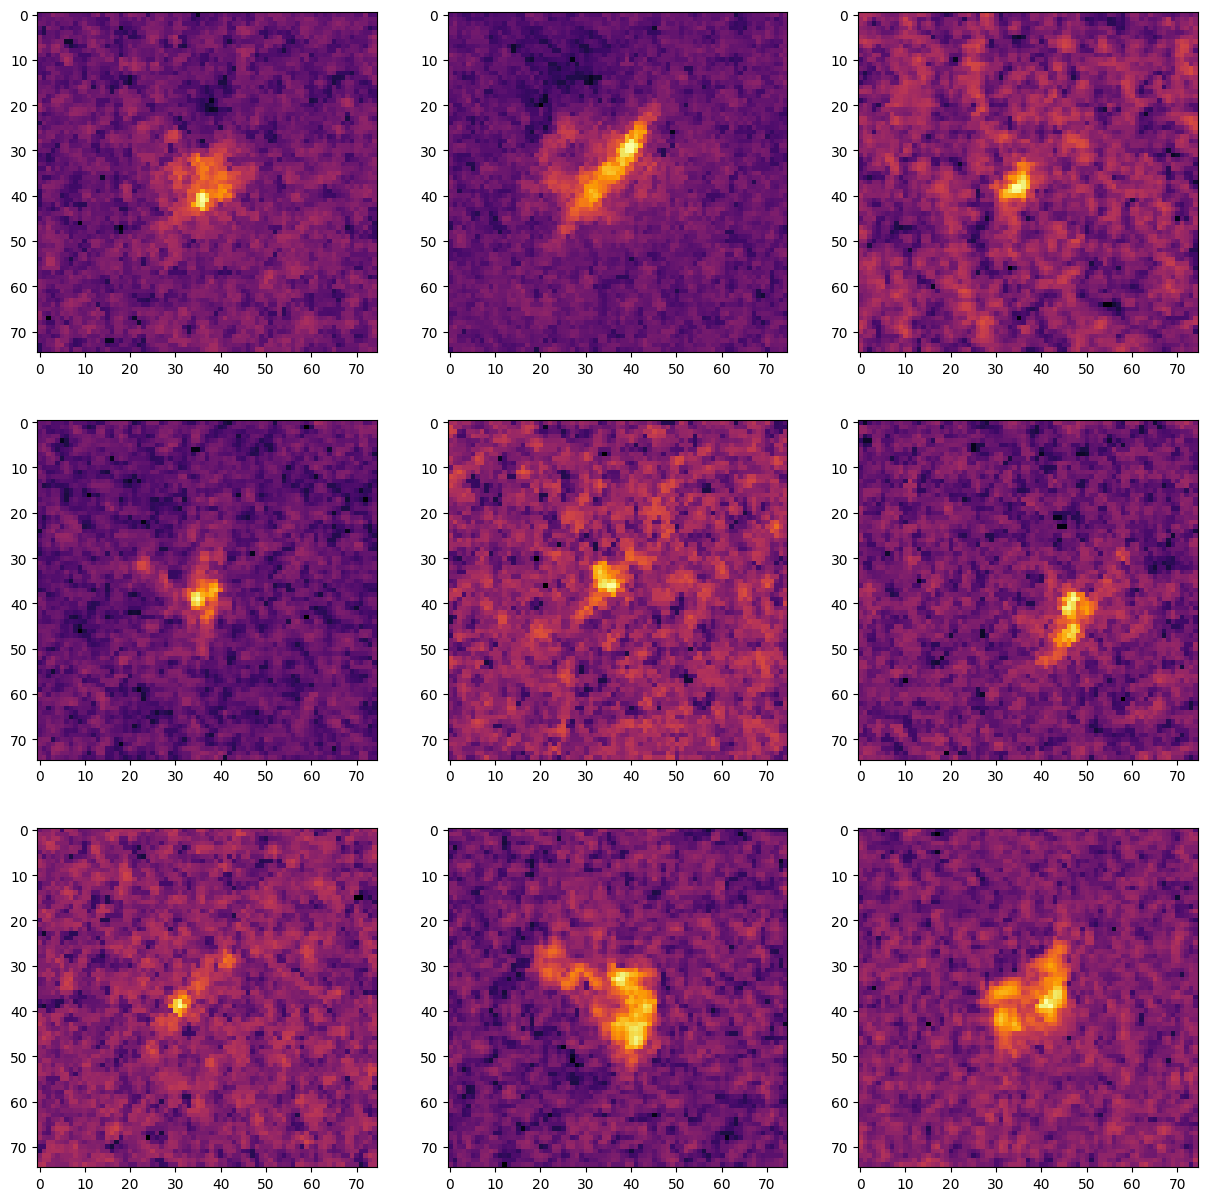

In [ ]:
# displaying 9 random iceberg pictures in band 1
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["band_1"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

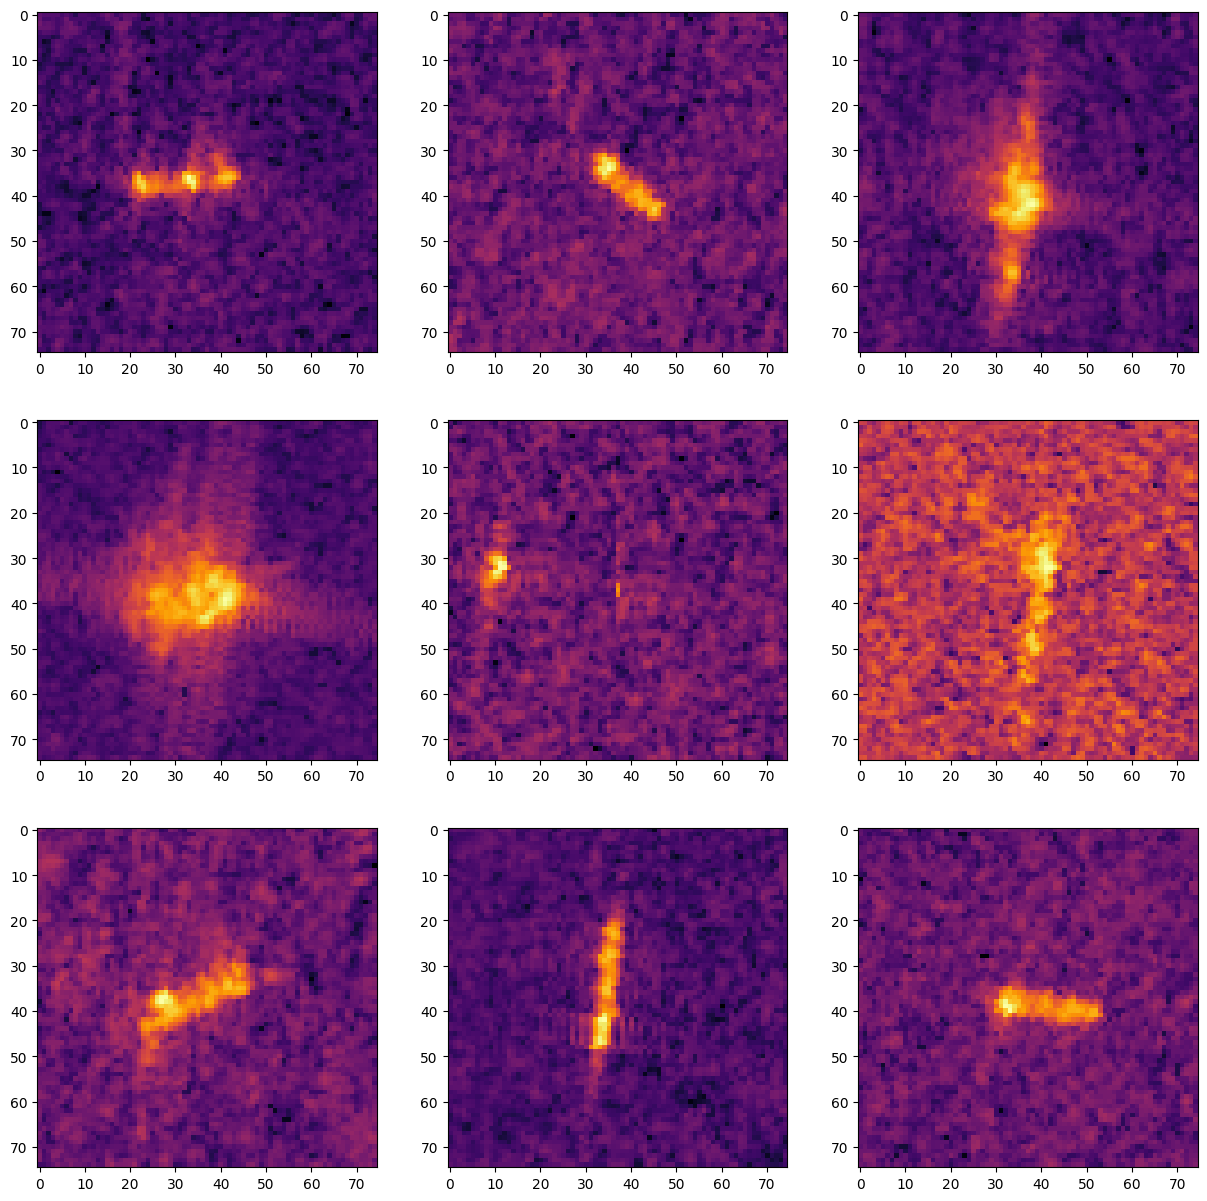

In [ ]:
# displaying 9 random ships pictures in band 1
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["band_1"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

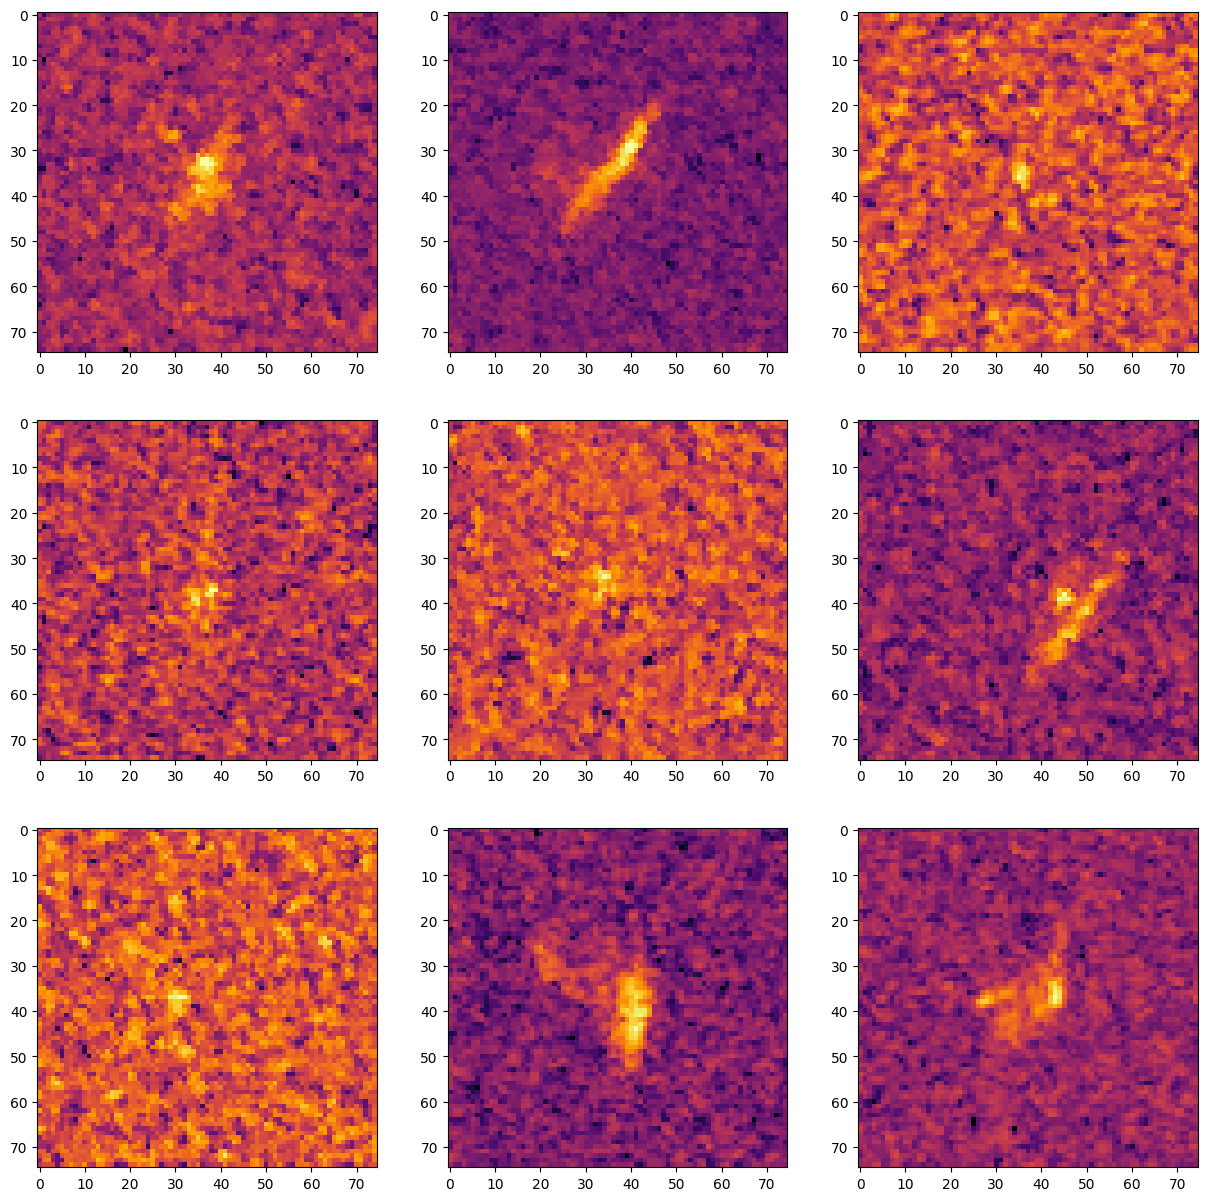

In [ ]:
# displaying 9 random iceberg pictures in band 2
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

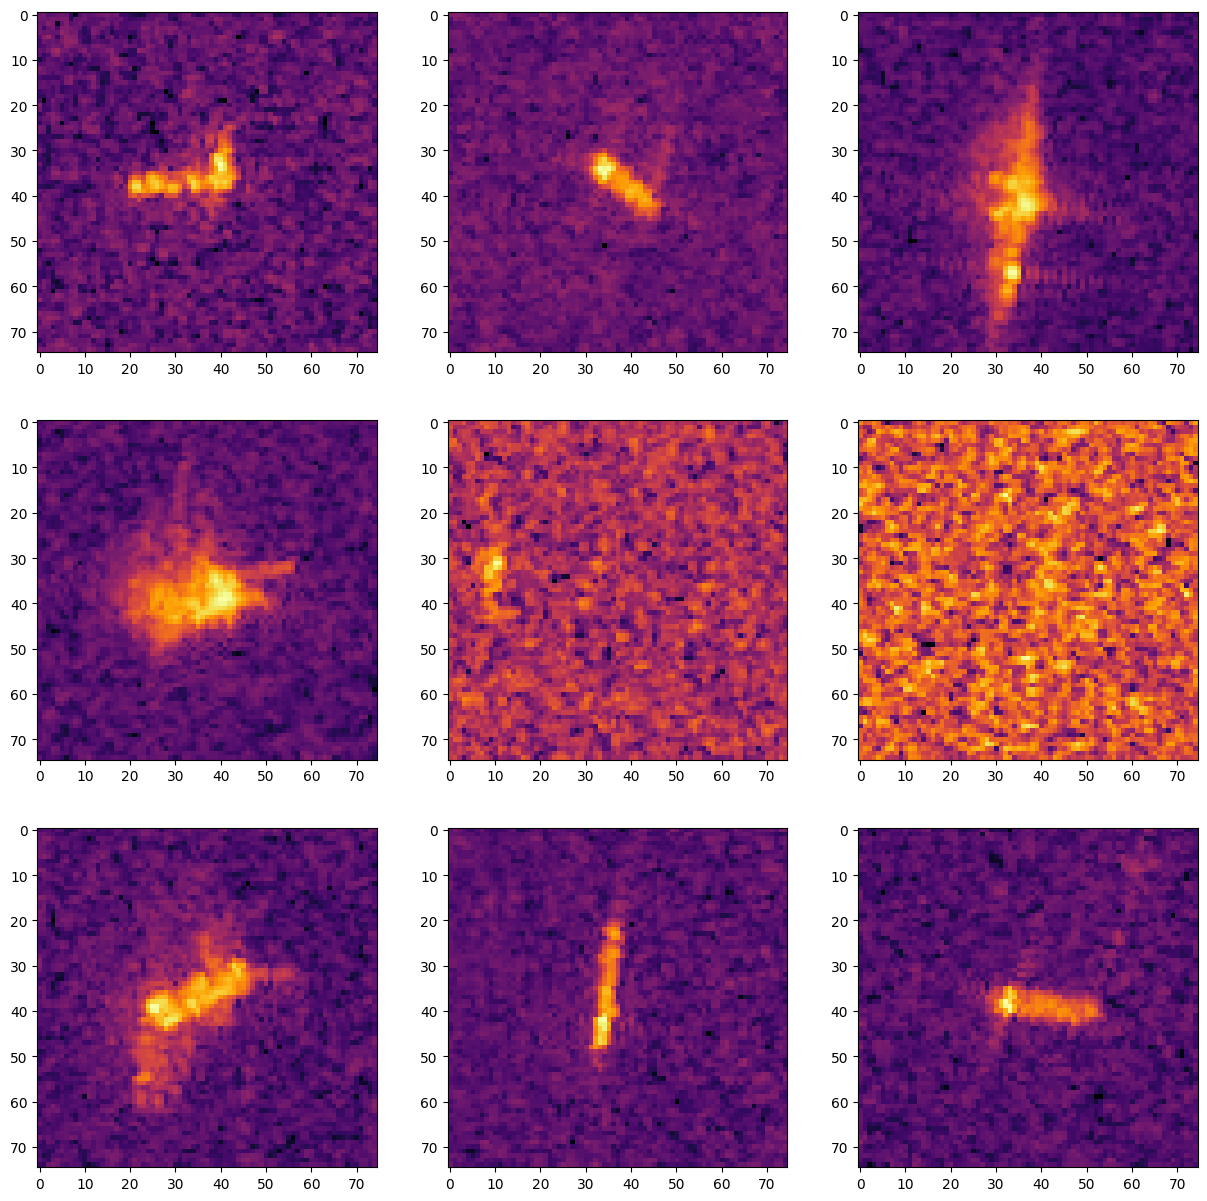

In [ ]:
# displaying 9 random ships pictures in band 2
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["band_2"].iloc[i]
  ax.imshow(arr,cmap = "inferno")

plt.show()

Transforming the images  

Just to know in the future which type of images give the best output.
Finding a filter that separates background noise from the true signal
Since SAR objects have salt ad pepper noise, I'll try SMOOTHENING FILTERS  and MEDIAN FILTERS  
After I'm going to try a high-pass filter to sharpen the edge features.

In [ ]:
#Setting up different kernels
from scipy import signal
#edge detection (gradient) - based methods
xder = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])
#center-weighted average (weighted box) smoothing kernel for images with small signal size to reduce noise
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])

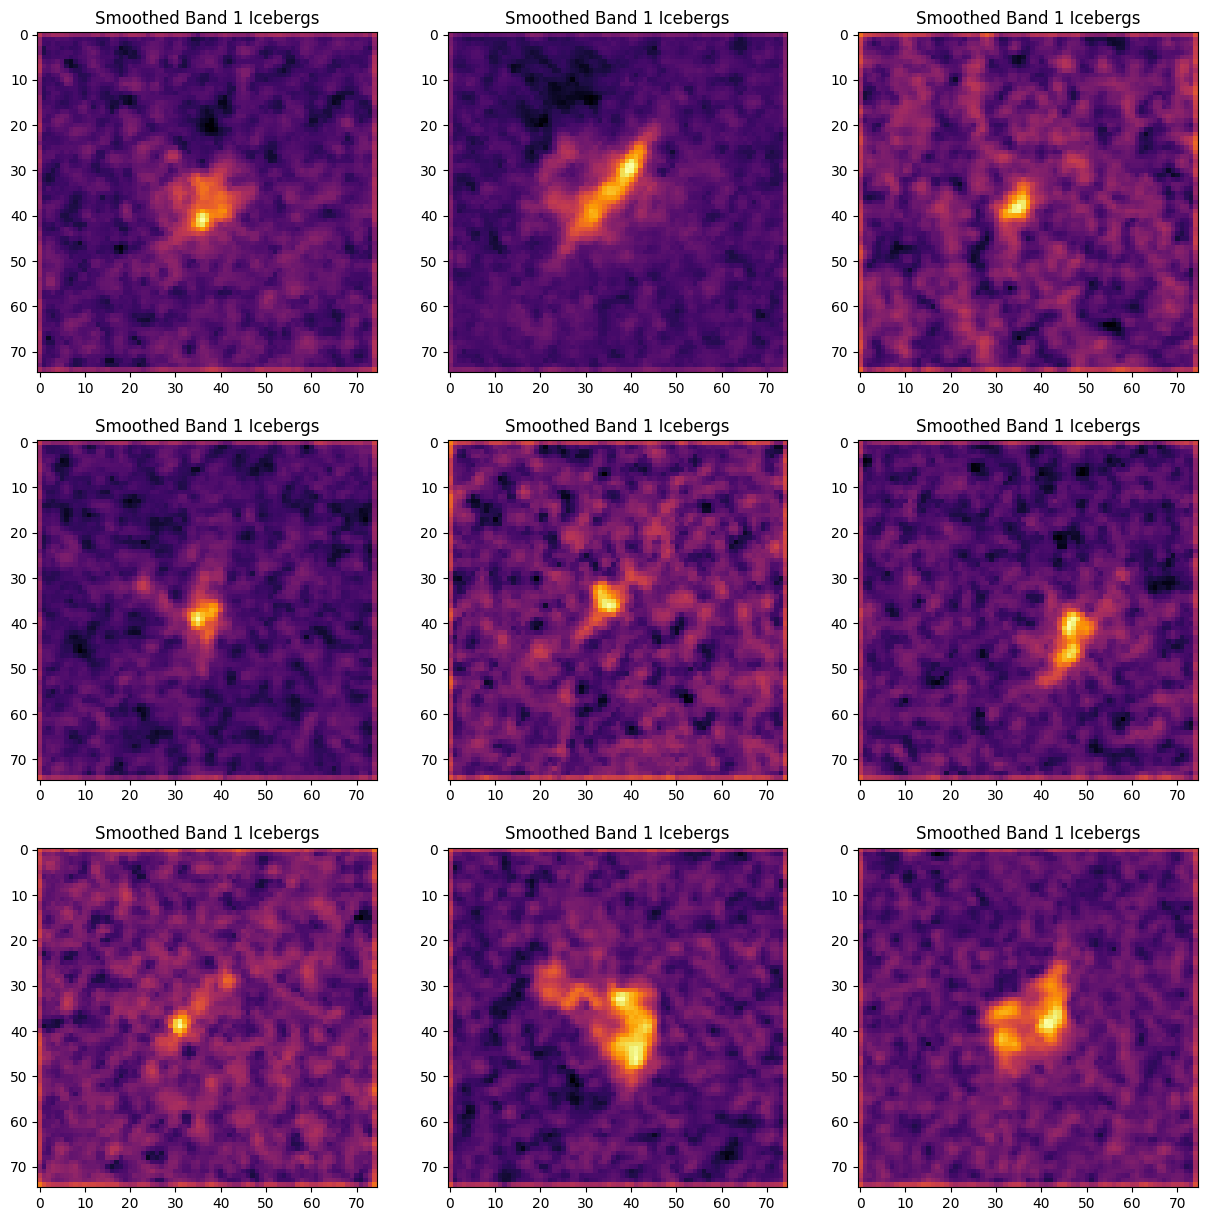

In [ ]:
#SMOOTHING
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  arr = signal.convolve2d(icebergs["band_1"].iloc[i], smooth, mode = "same")
  ax.imshow(arr, cmap ="inferno")
  ax.set_title ("Smoothed Band 1 Icebergs")

plt.show()

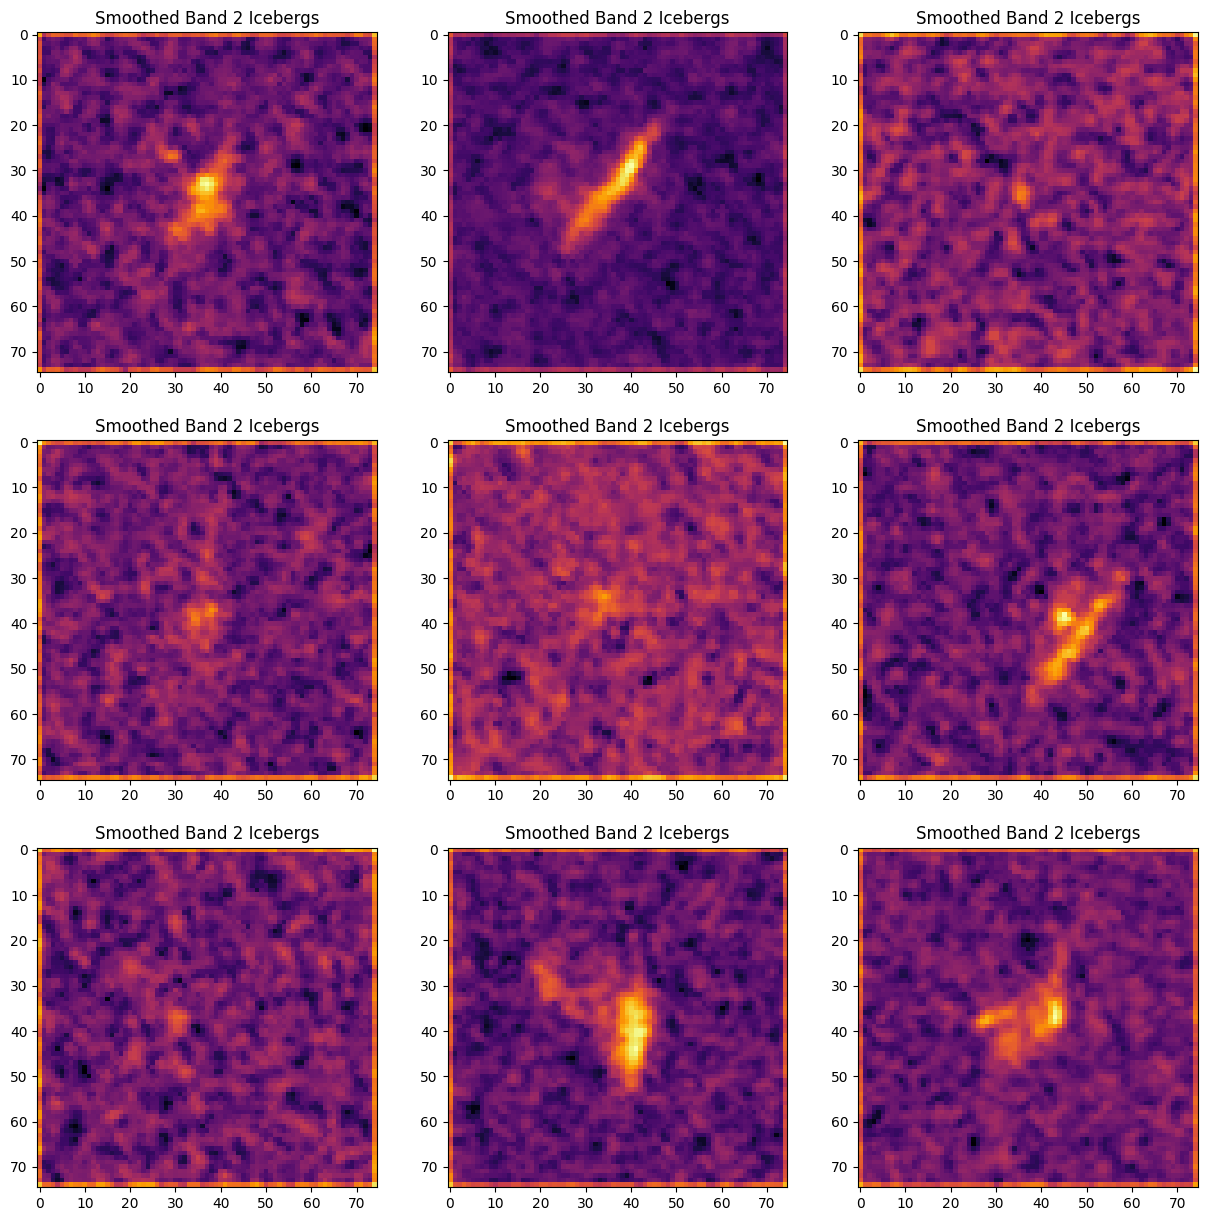

In [ ]:
#SMOOTHING
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  arr = signal.convolve2d(icebergs["band_2"].iloc[i], smooth, mode = "same")
  ax.imshow(arr, cmap ="inferno")
  ax.set_title ("Smoothed Band 2 Icebergs")
plt.show()

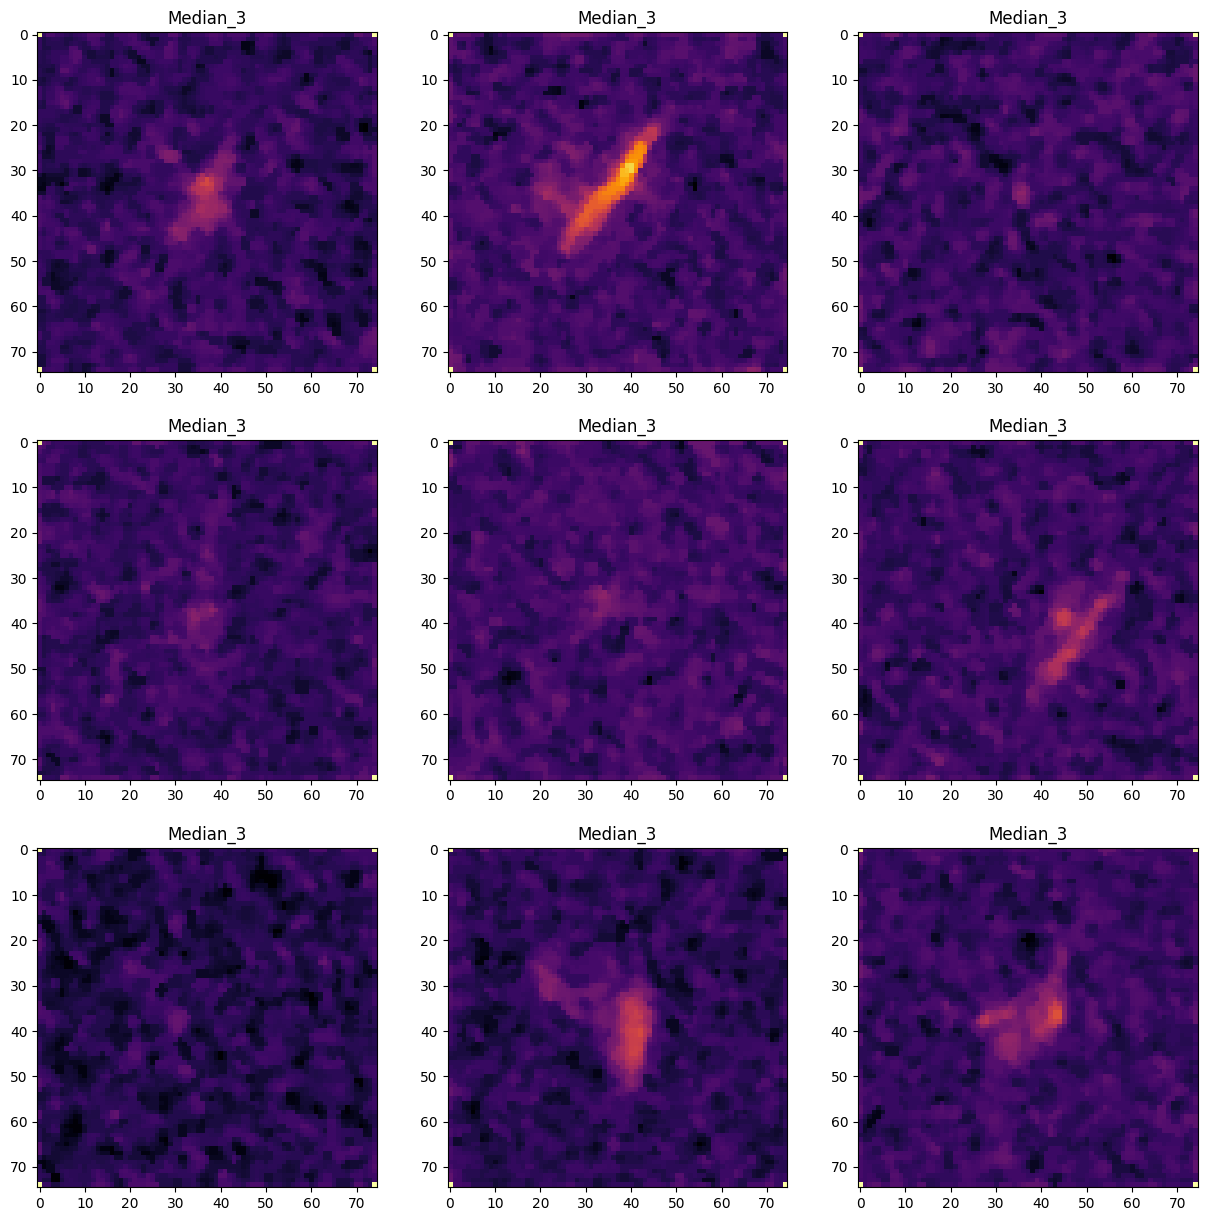

In [ ]:
#MEDIAN FILTER

fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  median_3 =signal.medfilt(arr, kernel_size=3)
  ax.imshow (median_3, cmap = "inferno")
  ax.set_title("Median_3")

plt.show()

Analysis: Smoothed images produced satisfactory results; however, the median_3 images appeared too blurry. Next, an edge detection filter will be applied, followed by sharpening the edges in both the smoothed and median_3 images.

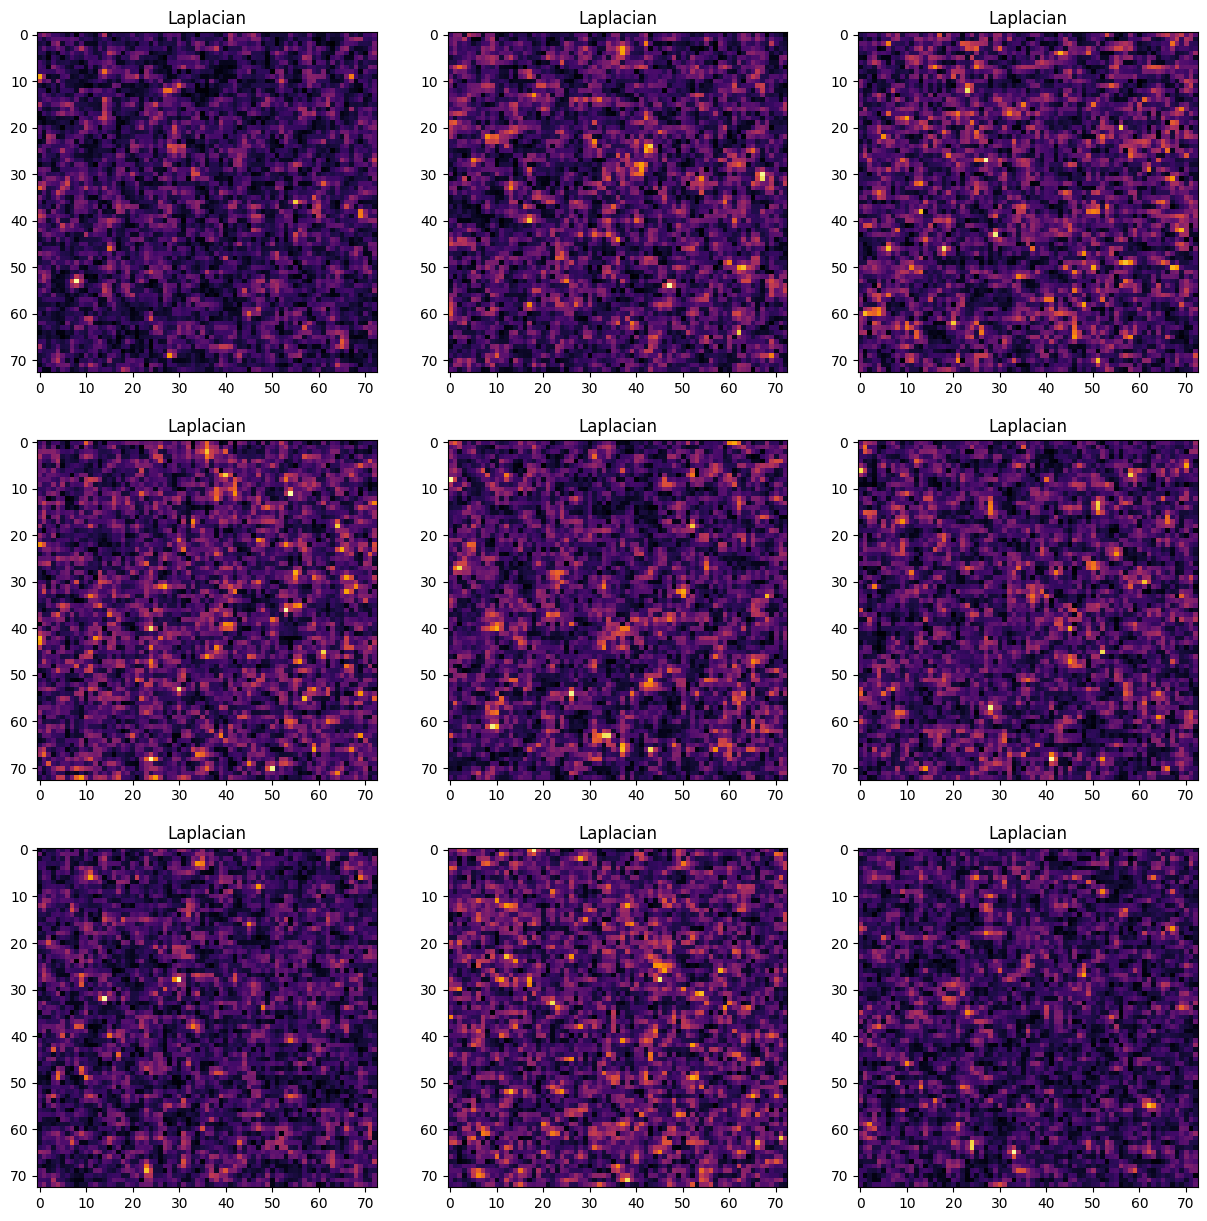

In [ ]:
#Second Derivatives (Laplacian)
fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arrx = signal.convolve2d(icebergs["band_2"].iloc[i], xder, mode ="valid")
  arry = signal.convolve2d(icebergs["band_2"].iloc[i], yder, mode ="valid")
  ax.imshow (np.hypot(arrx,arry), cmap = "inferno")
  ax.set_title("Laplacian")

plt.show()

In [ ]:
# High-pass filter kernel
high_pass = np.array([[-1,-1,-1],
                      [-1, 8,-1],
                      [-1,-1,-1]])

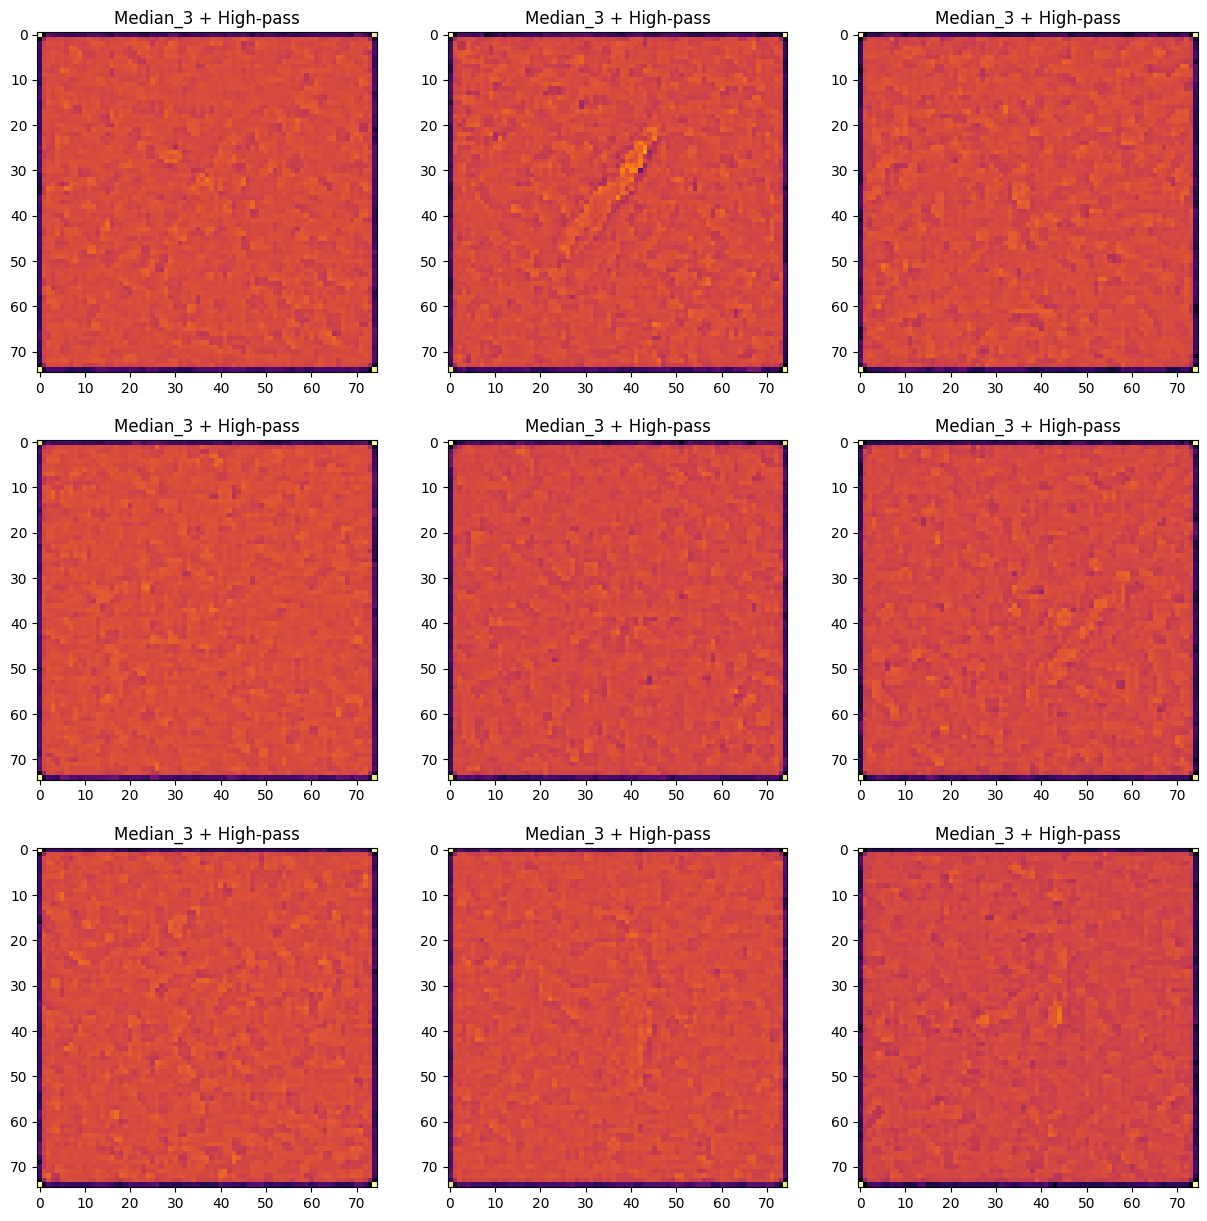

In [ ]:
#Applying a High Pass filter to the Median_3
fig = plt.figure(1, figsize= (15,15))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1)
  arr = icebergs["band_2"].iloc[i]
  median_3 =signal.medfilt(arr, kernel_size=3)
  high_passed = signal.convolve2d (median_3, high_pass, mode ="same")
  ax.imshow (high_passed, cmap = "inferno")
  ax.set_title("Median_3 + High-pass")

plt.show()

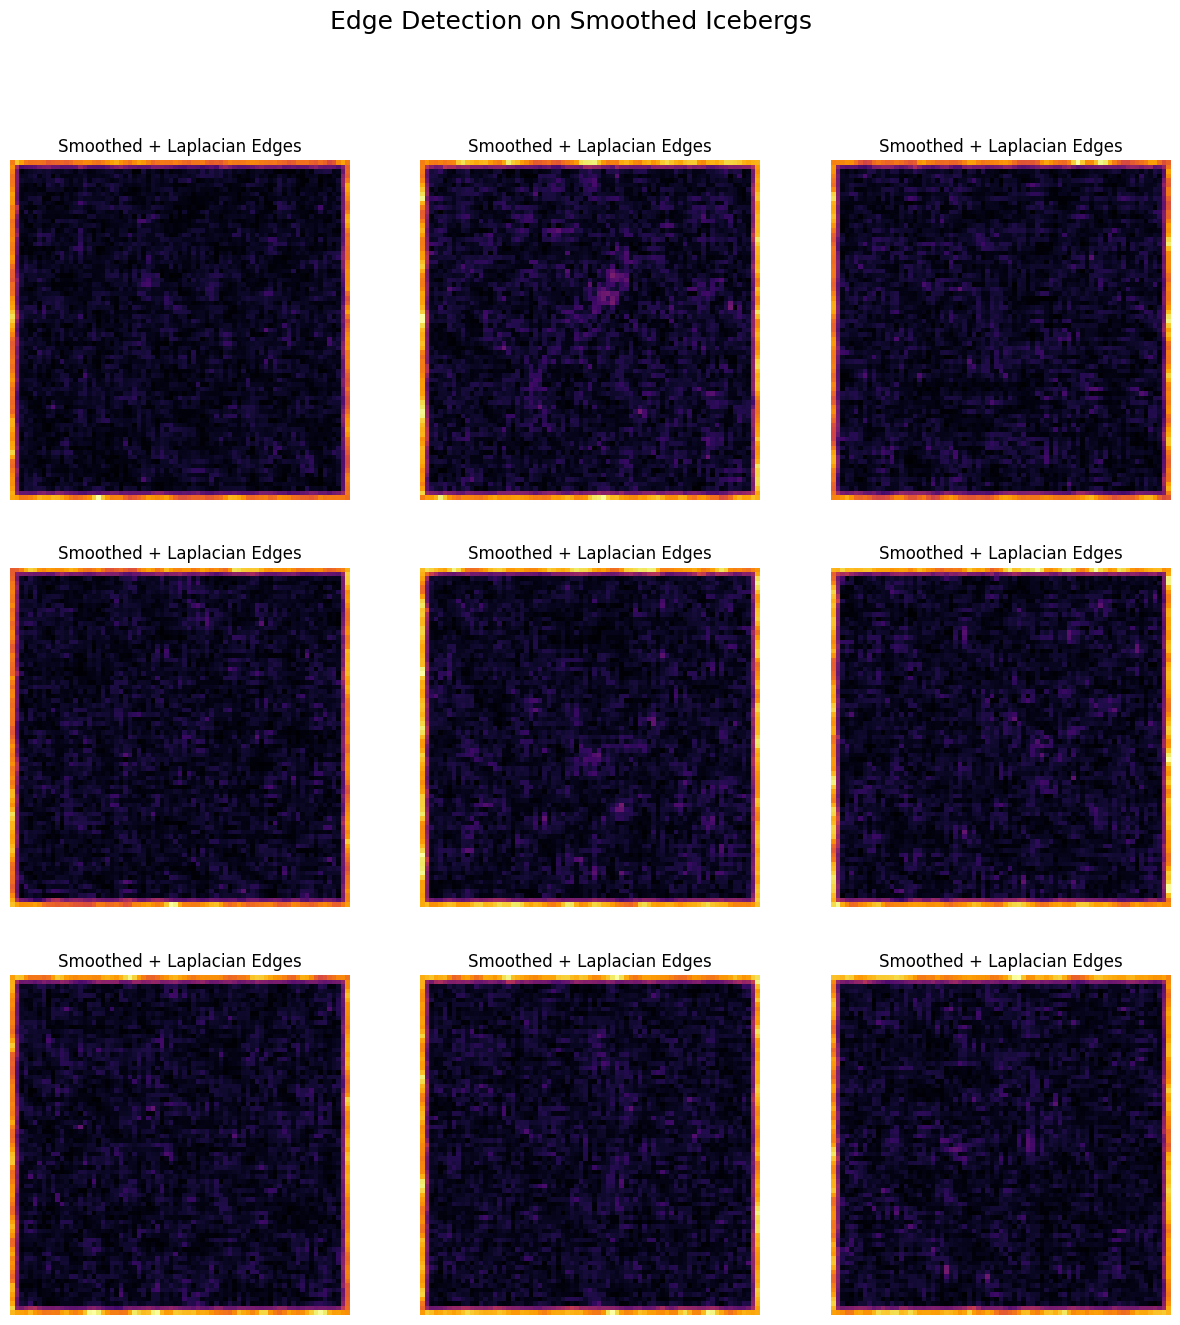

In [ ]:
#Applying a High Pass filter (Laplacian) to Smoothed
fig = plt.figure(1, figsize=(15,15))
for i in range(9):
  ax = fig.add_subplot (3,3, i+1)
  smoothed = signal.convolve2d(icebergs["band_2"].iloc[i], smooth, mode="same")
  grad_x = signal.convolve2d(smoothed, xder, mode="same")
  grad_y = signal.convolve2d(smoothed, yder, mode="same")

  edge_magnitude = np.sqrt(grad_x**2 + grad_y**2)

  ax.imshow(edge_magnitude, cmap="inferno")
  ax.set_title("Smoothed + Laplacian Edges")
  ax.axis("off")

fig.suptitle("Edge Detection on Smoothed Icebergs", fontsize=18)
plt.show()

Analysis: Applying a smoothing filter or median filter first to denoise, followed by an edge detector to highlight structures, may not be effective. So far, the smoothed filter alone produced the best results.

## Exploring Correlations

Few other interesting features to take a look at.

In [ ]:
df['inc_angle'] = pd.to_numeric(df['inc_angle'], errors='coerce')
df['hv_hh_ratio'] = df['band_2'] / (df['band_1'])
df['total_power'] = df['band_1'] + df['band_2']

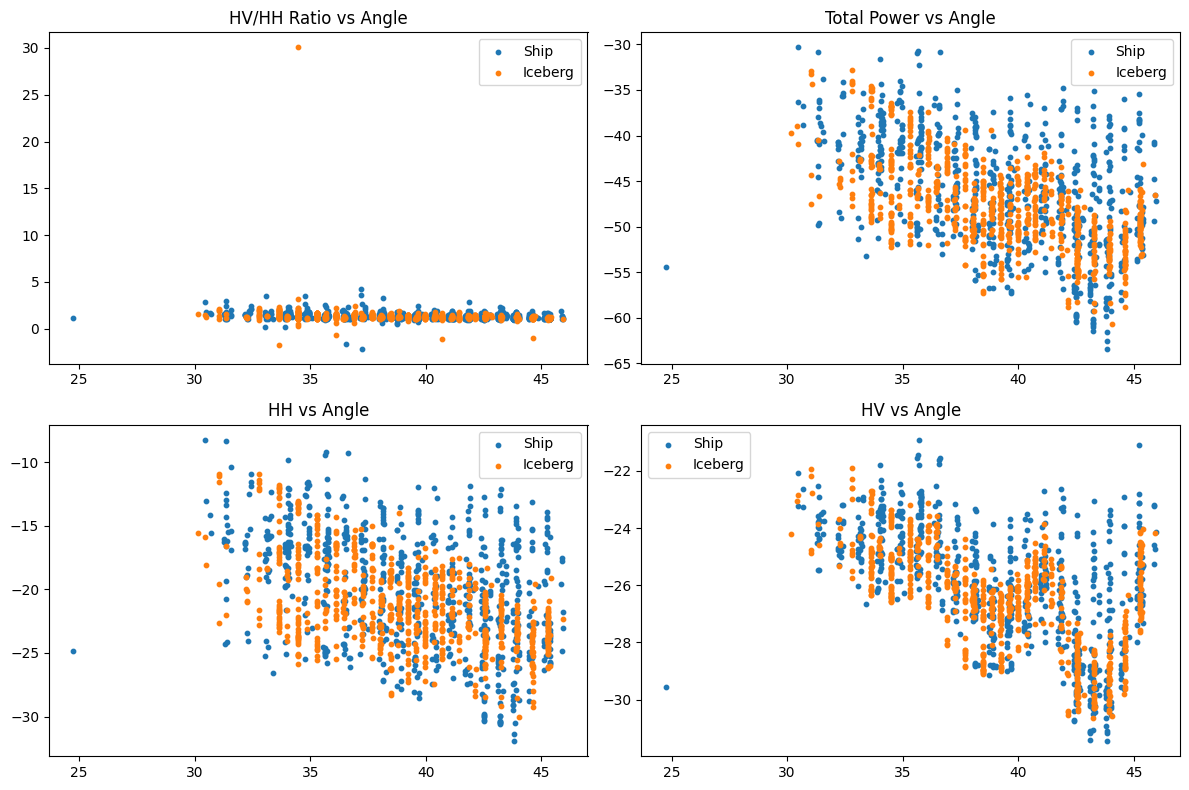

In [ ]:
df['ratio_mean'] = df['hv_hh_ratio'].apply(np.mean)
df['power_mean'] = df['total_power'].apply(np.mean)
df['band_1_mean'] = df['band_1'].apply(np.mean)
df['band_2_mean'] = df['band_2'].apply(np.mean)

ships = df[df['is_iceberg'] == 0]
icebergs = df[df['is_iceberg'] == 1]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].scatter(ships['inc_angle'], ships['ratio_mean'], label='Ship', s=10)
axes[0,0].scatter(icebergs['inc_angle'], icebergs['ratio_mean'], label='Iceberg', s=10)
axes[0,0].set_title('HV/HH Ratio vs Angle')
axes[0,0].legend()

axes[0,1].scatter(ships['inc_angle'], ships['power_mean'], label='Ship', s=10)
axes[0,1].scatter(icebergs['inc_angle'], icebergs['power_mean'], label='Iceberg', s=10)
axes[0,1].set_title('Total Power vs Angle')
axes[0,1].legend()

axes[1,0].scatter(ships['inc_angle'], ships['band_1_mean'], label='Ship', s=10)
axes[1,0].scatter(icebergs['inc_angle'], icebergs['band_1_mean'], label='Iceberg', s=10)
axes[1,0].set_title('HH vs Angle')
axes[1,0].legend()

axes[1,1].scatter(ships['inc_angle'], ships['band_2_mean'], label='Ship', s=10)
axes[1,1].scatter(icebergs['inc_angle'], icebergs['band_2_mean'], label='Iceberg', s=10)
axes[1,1].set_title('HV vs Angle')
axes[1,1].legend()

plt.tight_layout()
plt.show()

There seems to be a general trend of less energy as the angle increases which verifies the physics behind SAR imagery.

Keep in mind, these are means and take into account the ocean as well as the ships/vessels.

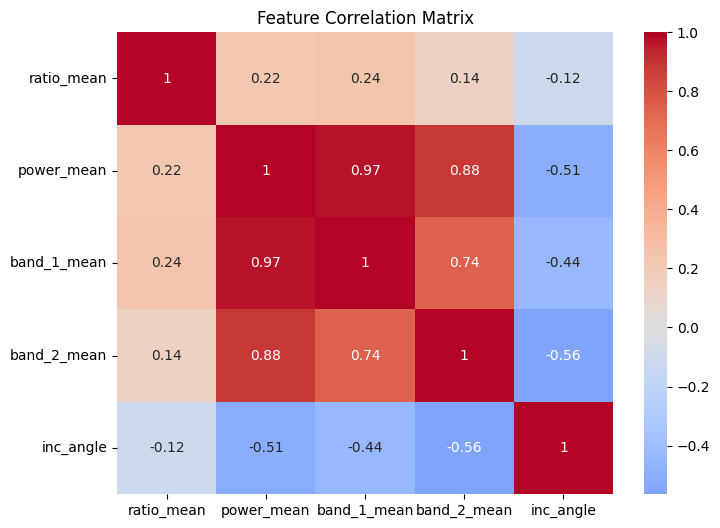

In [ ]:
features = ['ratio_mean', 'power_mean', 'band_1_mean', 'band_2_mean', 'inc_angle']
corr_matrix = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

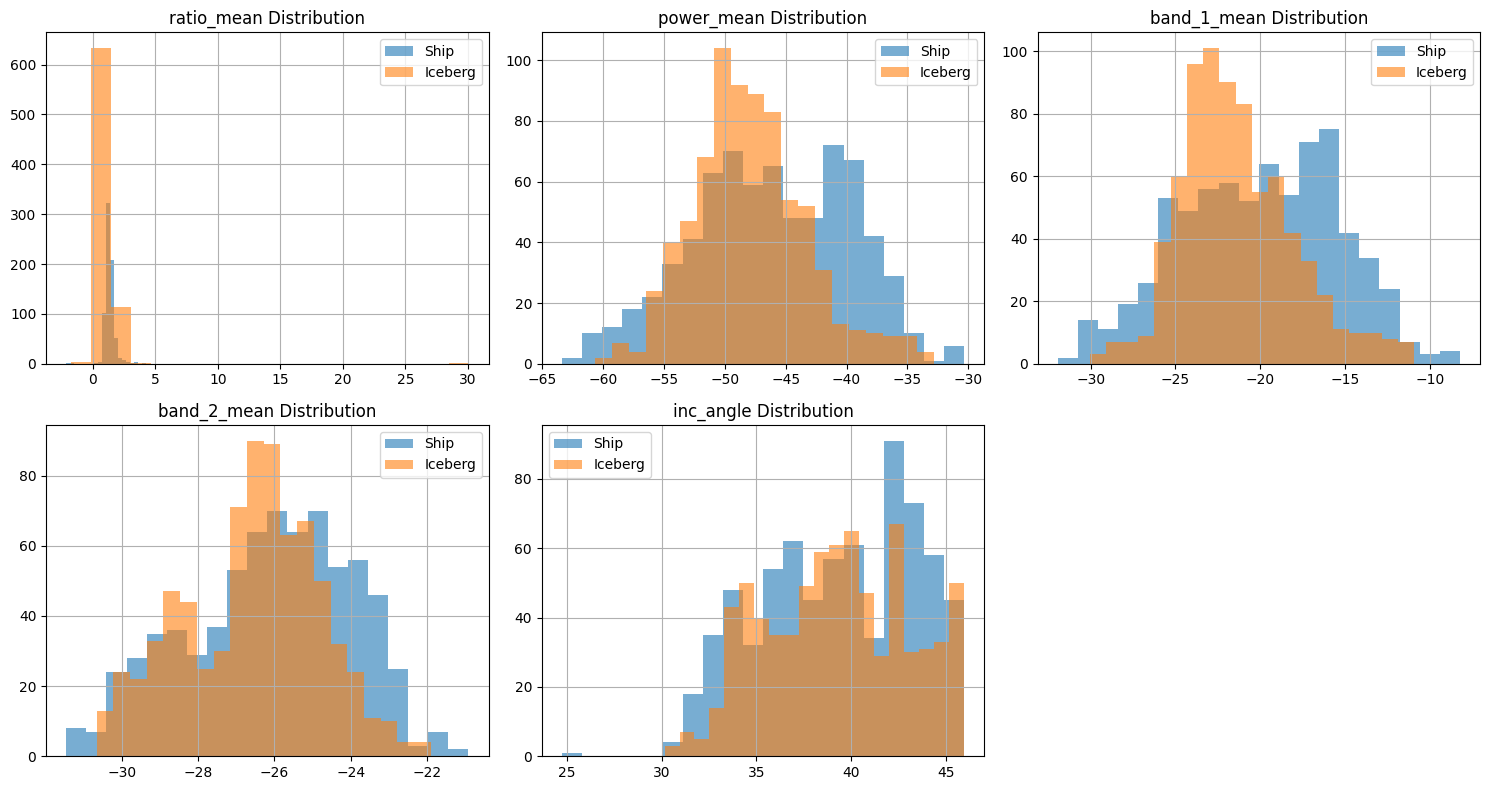

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, feature in enumerate(features):
   ax = axes[i//3, i%3]
   ships[feature].hist(alpha=0.6, bins=20, label='Ship', ax=ax)
   icebergs[feature].hist(alpha=0.6, bins=20, label='Iceberg', ax=ax)
   ax.set_title(f'{feature} Distribution')
   ax.legend()

axes[1, 2].remove()

plt.tight_layout()
plt.show()

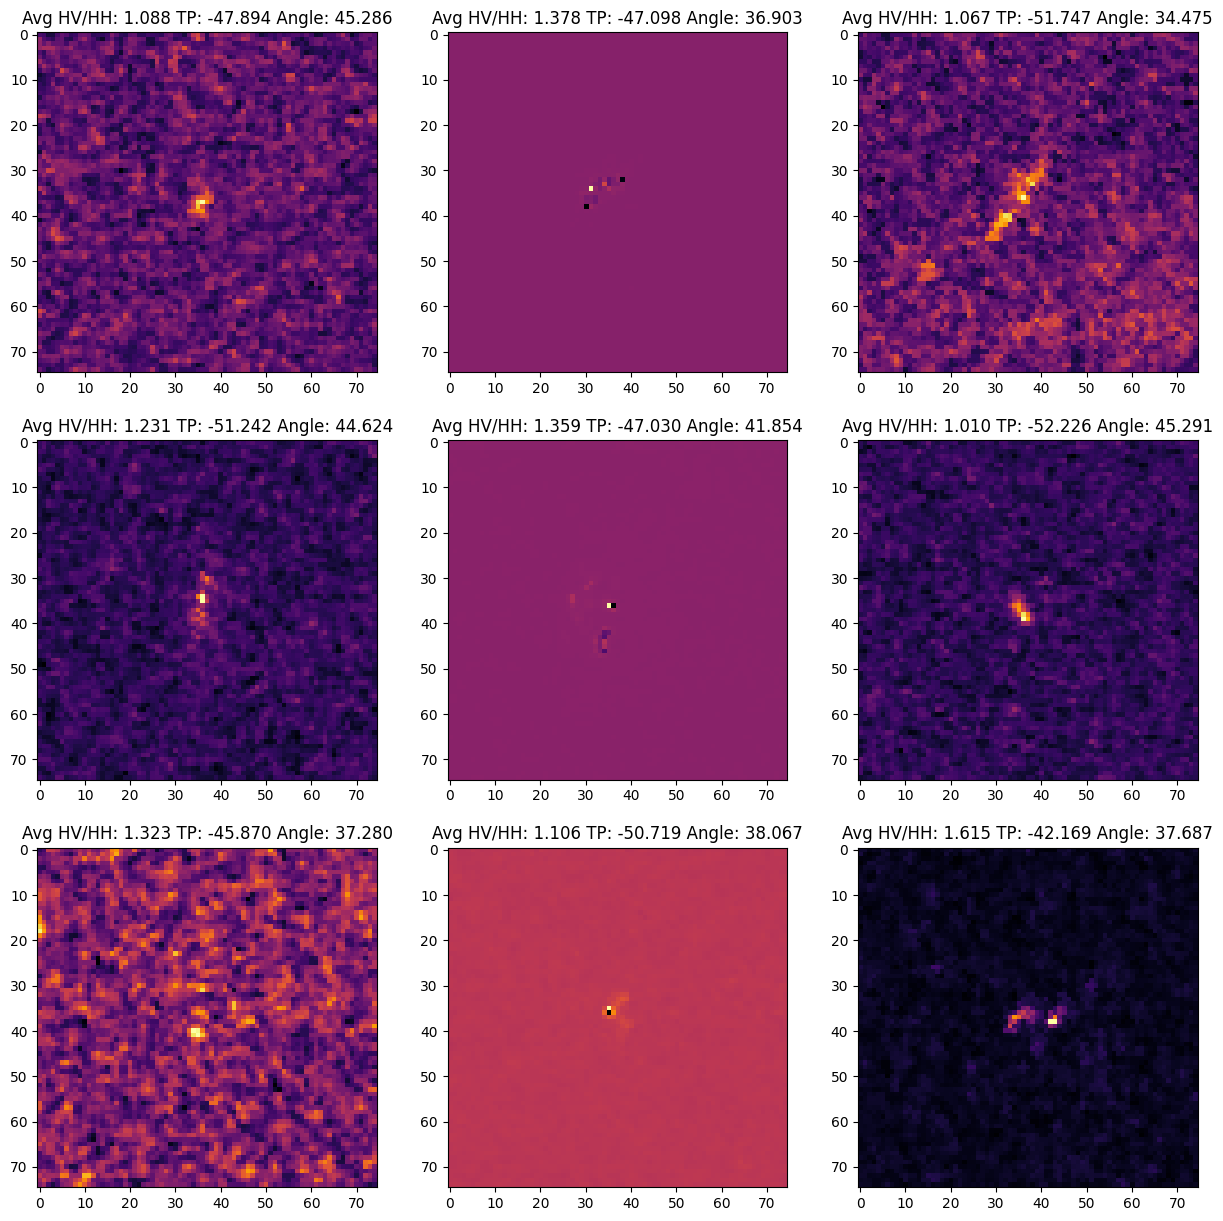

In [ ]:
# displaying 9 random iceberg pictures in HV/HH
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = icebergs["hv_hh_ratio"].iloc[i]
  avg_ratio = icebergs["ratio_mean"].iloc[i]
  tp = icebergs["power_mean"].iloc[i]
  angle = icebergs["inc_angle"].iloc[i]
  ax.imshow(arr,cmap = "inferno")
  ax.set_title(f'Avg HV/HH: {avg_ratio:.3f} TP: {tp:.3f} Angle: {angle:.3f}')


plt.show()

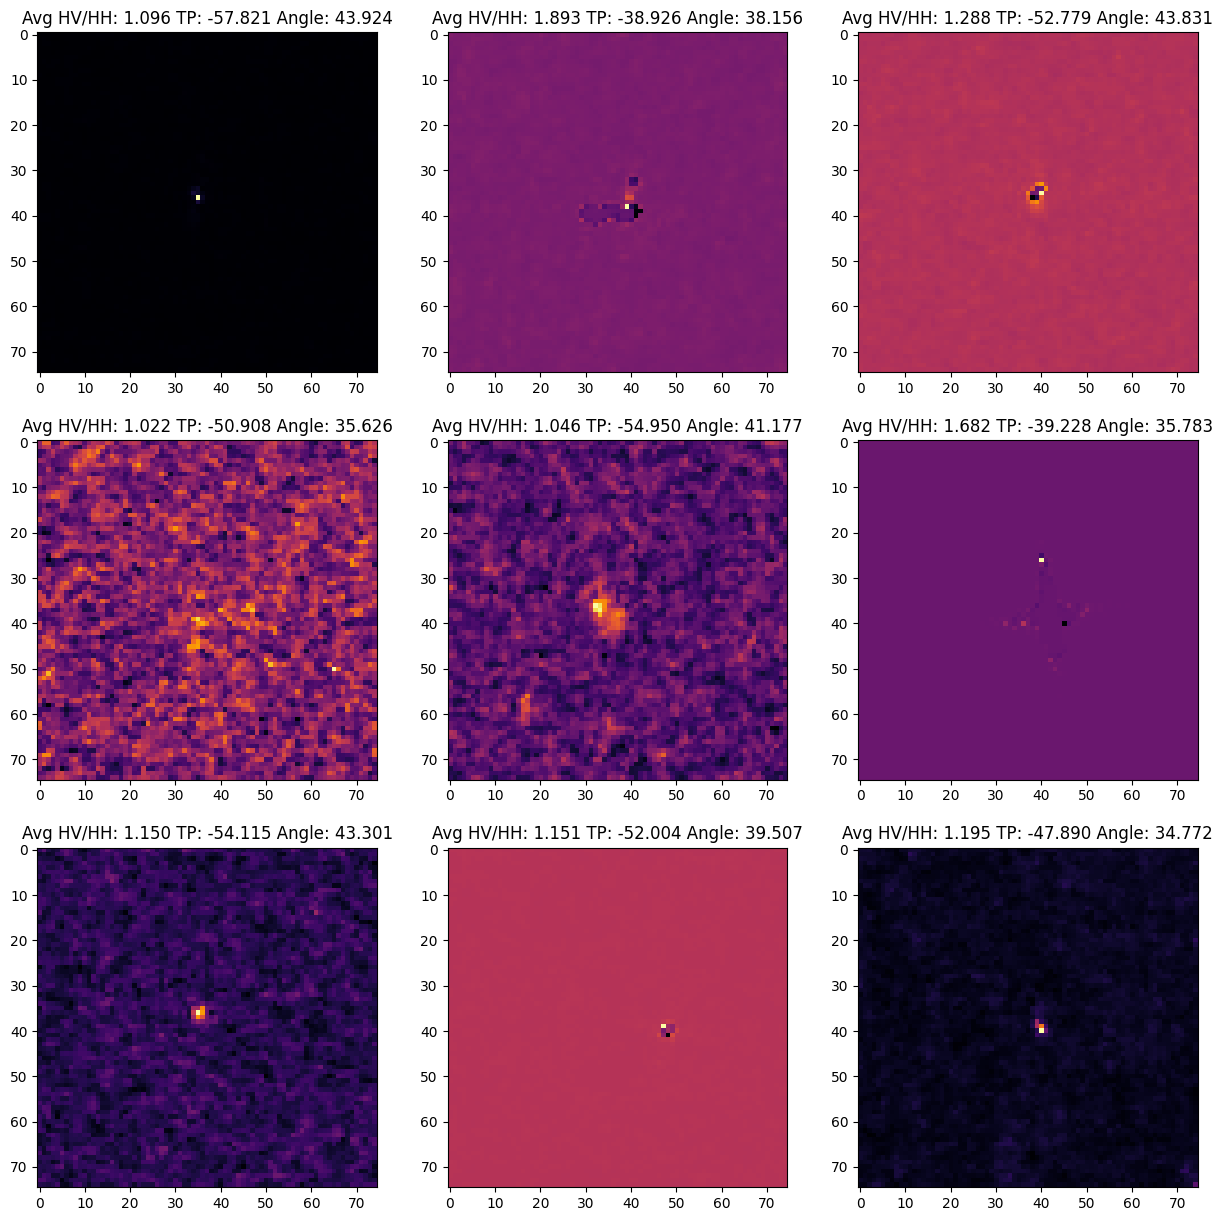

In [ ]:
# displaying 9 random ships pictures in HV/HH
fig = plt.figure(1, figsize =(15,15))
for i in range(9):
  ax =fig.add_subplot(3,3, i+1)
  arr = ships["hv_hh_ratio"].iloc[i]
  avg_ratio = ships["ratio_mean"].iloc[i]
  tp = ships["power_mean"].iloc[i]
  angle = ships["inc_angle"].iloc[i]
  ax.imshow(arr,cmap = "inferno")
  ax.set_title(f'Avg HV/HH: {avg_ratio:.3f} TP: {tp:.3f} Angle: {angle:.3f}')

plt.show()